# Exploratory Data Analysis Project - Top Spotify Songs

In this Project, I clean and analyse the 'Top Spotify Songs in 73 Countries' dataset from Kaggle. This dataset contains the Daily Top 50 songs on Spotify in 72 countries and also Globally, from Oct 18th, 2023 to Feb 24th, 2025.

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

# setting display options
pd.options.display.expand_frame_repr = False
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100

### Loading Dataset

In [3]:
raw_df = pd.read_csv(r'Data_TopSpotifySongs.csv')
raw_df.info(show_counts=True)
raw_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753630 entries, 0 to 1753629
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1753630 non-null  object 
 1   name                1753600 non-null  object 
 2   artists             1753601 non-null  object 
 3   daily_rank          1753630 non-null  int64  
 4   daily_movement      1753630 non-null  int64  
 5   weekly_movement     1753630 non-null  int64  
 6   country             1729673 non-null  object 
 7   snapshot_date       1753630 non-null  object 
 8   popularity          1753630 non-null  int64  
 9   is_explicit         1753630 non-null  bool   
 10  duration_ms         1753630 non-null  int64  
 11  album_name          1752809 non-null  object 
 12  album_release_date  1752972 non-null  object 
 13  danceability        1753630 non-null  float64
 14  energy              1753630 non-null  float64
 15  key            

spotify_id                               name                      artists  daily_rank  daily_movement  weekly_movement country snapshot_date  popularity  is_explicit  duration_ms            album_name album_release_date  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence    tempo  time_signature
0        2plbrEY59IikOBgBGLjaoe                   Die With A Smile        Lady Gaga, Bruno Mars           1               0                0     NaN    2025-02-24          97        False       251667      Die With A Smile         2024-08-16         0.521   0.592    6    -7.777     0       0.0304        0.3080          0.000000     0.122    0.535  157.969               3
1        2CGNAOSuO1MEFCbBRgUzjd                  luther (with sza)          Kendrick Lamar, SZA           2               1                0     NaN    2025-02-24          90        False       177598                   GNX         2024-11-21         0.707   0.575    2    -7.546     1       0.1250        0.2510          0.000000     0.248    0.576  138.008               4
2        4wJ5Qq0jBN4ajy7ouZIV1c                               APT.             ROSÉ, Bruno Mars           3              -1                1     NaN    2025-02-24          88        False       169917                 rosie         2024-12-06         0.777   0.783    0    -4.477     0       0.2600        0.0283          0.000000     0.355    0.939  149.027               4
3        6AI3ezQ4o3HUoP6Dhudph3                        Not Like Us               Kendrick Lamar           4               0               -1     NaN    2025-02-24          93         True       274192           Not Like Us         2024-05-04         0.898   0.472    1    -7.001     1       0.0776        0.0107          0.000000     0.141    0.214  101.061               4
4        6dOtVTDdiauQNBQEDOtlAB                 BIRDS OF A FEATHER                Billie Eilish           5               0                0     NaN    2025-02-24          94        False       210373  HIT ME HARD AND SOFT         2024-05-17         0.747   0.507    2   -10.171     1       0.0358        0.2000          0.060800     0.117    0.438  104.978               4
...                         ...                                ...                          ...         ...             ...              ...     ...           ...         ...          ...          ...                   ...                ...           ...     ...  ...       ...   ...          ...           ...               ...       ...      ...      ...             ...
1753625  0AYt6NMyyLd0rLuvr0UkMH          Slime You Out (feat. SZA)                   Drake, SZA          46               4                0      AE    2023-10-18          84         True       310490      For All The Dogs         2023-10-06         0.483   0.408    5    -9.243     0       0.0502        0.5080          0.000000     0.259    0.105   88.880               3
1753626  2Gk6fi0dqt91NKvlzGsmm7  SAY MY GRACE (feat. Travis Scott)         Offset, Travis Scott          47               3                0      AE    2023-10-18          80         True       173253            SET IT OFF         2023-10-13         0.773   0.635   10    -5.060     1       0.0452        0.0585          0.000000     0.132    0.476  121.879               4
1753627  26b3oVLrRUaaybJulow9kz                             People                     Libianca          48               2                0      AE    2023-10-18          88        False       184791                People         2022-12-06         0.573   0.422   10    -7.621     0       0.0678        0.5510          0.000013     0.102    0.693  124.357               5
1753628  5ydjxBSUIDn26MFzU3asP4                         Rainy Days                            V          49               1                0      AE    2023-10-18          88        False       179560               Layover         2023-08-11         0.633   0.454    9    -8.016   

### Data Cleaning

Renaming Columns

In [4]:
for column_name in raw_df:
    new_column_name = column_name.replace(' ','_')
    raw_df.rename(columns={column_name:new_column_name.capitalize()},inplace=True)

raw_df.rename(columns={'Duration_ms':'Duration'},inplace=True)

Correcting Datatypes

In [5]:
# Converting datatypes from object to datetime
raw_df['Snapshot_date'] = pd.to_datetime(raw_df['Snapshot_date'], format='%Y-%m-%d')
raw_df['Album_release_date'] = pd.to_datetime(raw_df['Album_release_date'], format='%Y-%m-%d')

Correcting Column Values

In [6]:
# Changing to UPPER CASE
raw_df['Name'] = raw_df['Name'].str.upper()
raw_df['Artists'] = raw_df['Artists'].str.upper()
raw_df['Album_name'] = raw_df['Album_name'].str.upper()

In [7]:
# Rounding Floating points
raw_df['Loudness'] = raw_df['Loudness'].round(2)
raw_df['Speechiness'] = raw_df['Speechiness'].round(4)
raw_df['Acousticness'] = raw_df['Acousticness'].round(4)
raw_df['Instrumentalness'] = raw_df['Instrumentalness'].round(4)
raw_df['Tempo'] = raw_df['Tempo'].round(0).astype(int)

In [8]:
# Changing Duration from ms to mins:secs format
raw_df['Duration'] = pd.to_datetime(raw_df['Duration'], unit='ms').dt.round('s').dt.strftime('%M:%S')

In [9]:
# Replacing country codes with country names in UPPER CASE
# Replacing Null values with 'GLOBAL' as they represent 'Global Top 50 Songs' (mentioned in source)
countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name.split(',')[0].upper()
countries[pd.NA] = 'GLOBAL'

raw_df['Country'] = raw_df['Country'].replace(countries)

Fixing Null Values

In [10]:
# Checking for songs with 0 sec Duration
zero_sec_songs = pd.to_timedelta('00:' + raw_df['Duration']) == pd.to_timedelta('0 seconds')
print("Number of songs with 0 sec Duration: ", zero_sec_songs.sum(), "\n")

# Checking for Null values
print(raw_df.isna().sum())

Number of songs with 0 sec Duration:  29 

Spotify_id              0
Name                   30
Artists                29
Daily_rank              0
Daily_movement          0
Weekly_movement         0
Country                 0
Snapshot_date           0
Popularity              0
Is_explicit             0
Duration                0
Album_name            821
Album_release_date    658
Danceability            0
Energy                  0
Key                     0
Loudness                0
Mode                    0
Speechiness             0
Acousticness            0
Instrumentalness        0
Liveness                0
Valence                 0
Tempo                   0
Time_signature          0
dtype: int64


In [11]:
# Removing rows with Null Album_name (since it has the highest number of Null values)
raw_df.dropna(subset='Album_name', inplace=True, ignore_index=True)

In [12]:
# Checking again for songs with 0 sec Duration
zero_sec_songs = pd.to_timedelta('00:' + raw_df['Duration']) == pd.to_timedelta('0 seconds')
print("Number of songs with 0 sec Duration: ", zero_sec_songs.sum(), "\n")

# Checking again for Null values
print(raw_df.isna().sum())

Number of songs with 0 sec Duration:  0 

Spotify_id            0
Name                  0
Artists               0
Daily_rank            0
Daily_movement        0
Weekly_movement       0
Country               0
Snapshot_date         0
Popularity            0
Is_explicit           0
Duration              0
Album_name            0
Album_release_date    0
Danceability          0
Energy                0
Key                   0
Loudness              0
Mode                  0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Time_signature        0
dtype: int64


Fixing Duplicates

In [13]:
# Checking for duplicates
print('Duplicate rows:', raw_df.duplicated().sum())

Duplicate rows: 0


In [40]:
# Checking for duplicate values for same Spotify_id
columns = ['Name', 'Artists', 'Is_explicit', 'Duration', 'Album_name', 'Album_release_date', 
           'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 
           'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time_signature']
for column in columns:
    dupes = raw_df.drop_duplicates(subset=['Spotify_id', column]).groupby(by='Spotify_id').count()
    print(f'Duplicate {column} values: ', dupes[dupes[column] > 1].count()[column])

Duplicate Name values:  95
Duplicate Artists values:  306
Duplicate Is_explicit values:  70
Duplicate Duration values:  48
Duplicate Album_name values:  110
Duplicate Album_release_date values:  117
Duplicate Danceability values:  386
Duplicate Energy values:  380
Duplicate Key values:  70
Duplicate Loudness values:  352
Duplicate Mode values:  46
Duplicate Speechiness values:  403
Duplicate Acousticness values:  386
Duplicate Instrumentalness values:  117
Duplicate Liveness values:  349
Duplicate Valence values:  403
Duplicate Tempo values:  64
Duplicate Time_signature values:  20


In [41]:
# Replacing the above duplicate values by the latest value
for column in columns:
    id_mapping = raw_df.drop_duplicates(subset='Spotify_id').set_index('Spotify_id')[column]
    raw_df[column] = raw_df['Spotify_id'].map(id_mapping)

In [42]:
# Checking again for duplicate values for same Spotify_id
for column in columns:
    dupes = raw_df.drop_duplicates(subset=['Spotify_id', column]).groupby(by='Spotify_id').count()
    print(f'Duplicate {column} values: ', dupes[dupes[column] > 1].count()[column])

Duplicate Name values:  0
Duplicate Artists values:  0
Duplicate Is_explicit values:  0
Duplicate Duration values:  0
Duplicate Album_name values:  0
Duplicate Album_release_date values:  0
Duplicate Danceability values:  0
Duplicate Energy values:  0
Duplicate Key values:  0
Duplicate Loudness values:  0
Duplicate Mode values:  0
Duplicate Speechiness values:  0
Duplicate Acousticness values:  0
Duplicate Instrumentalness values:  0
Duplicate Liveness values:  0
Duplicate Valence values:  0
Duplicate Tempo values:  0
Duplicate Time_signature values:  0


### Statistical Analysis

Describe

In [43]:
raw_df.describe()

Daily_rank  Daily_movement  Weekly_movement                  Snapshot_date    Popularity             Album_release_date  Danceability        Energy           Key      Loudness          Mode   Speechiness  Acousticness  Instrumentalness      Liveness       Valence         Tempo  Time_signature
count  1.752809e+06    1.752809e+06     1.752809e+06                        1752809  1.752809e+06                        1752809  1.752809e+06  1.752809e+06  1.752809e+06  1.752809e+06  1.752809e+06  1.752809e+06  1.752809e+06      1.752809e+06  1.752809e+06  1.752809e+06  1.752809e+06    1.752809e+06
mean   2.548671e+01    9.234509e-01     2.785321e+00  2024-06-18 03:22:57.023737088  7.605421e+01  2022-03-17 05:53:21.114326528  6.783163e-01  6.495284e-01  5.545220e+00 -6.626109e+00  5.381197e-01  9.482191e-02  2.741544e-01      2.072047e-02  1.707781e-01  5.492657e-01  1.221903e+02    3.901126e+00
min    1.000000e+00   -4.900000e+01    -4.900000e+01            2023-10-18 00:00:00  0.000000e+00            1900-01-01 00:00:00  0.000000e+00  1.740000e-03  0.000000e+00 -5.434000e+01  0.000000e+00  0.000000e+00  0.000000e+00      0.000000e+00  1.390000e-02  0.000000e+00  0.000000e+00    0.000000e+00
25%    1.300000e+01   -1.000000e+00    -3.000000e+00            2024-02-15 00:00:00  6.500000e+01            2023-05-19 00:00:00  5.830000e-01  5.520000e-01  2.000000e+00 -7.780000e+00  0.000000e+00  3.880000e-02  6.700000e-02      0.000000e+00  9.610000e-02  3.710000e-01  1.000000e+02    4.000000e+00
50%    2.500000e+01    0.000000e+00     0.000000e+00            2024-06-18 00:00:00  8.000000e+01            2023-12-01 00:00:00  7.000000e-01  6.680000e-01  6.000000e+00 -6.010000e+00  1.000000e+00  5.790000e-02  1.890000e-01      0.000000e+00  1.210000e-01  5.520000e-01  1.200000e+02    4.000000e+00
75%    3.800000e+01    2.000000e+00     5.000000e+00            2024-10-16 00:00:00  8.800000e+01            2024-05-24 00:00:00  7.830000e-01  7.660000e-01  9.000000e+00 -4.710000e+00  1.000000e+00  1.100000e-01  4.360000e-01      1.000000e-04  2.050000e-01  7.340000e-01  1.400000e+02    4.000000e+00
max    5.000000e+01    4.900000e+01     4.900000e+01            2025-02-24 00:00:00  1.000000e+02            2025-02-23 00:00:00  9.880000e-01  9.980000e-01  1.100000e+01  2.620000e+00  1.000000e+00  9.390000e-01  9.960000e-01      9.950000e-01  9.780000e-01  9.920000e-01  2.360000e+02    5.000000e+00
std    1.442857e+01    6.996825e+00     1.214209e+01                            NaN  1.575542e+01                            NaN  1.422322e-01  1.668444e-01  3.577708e+00  3.400600e+00  4.985449e-01  9.071362e-02  2.508294e-01      1.055109e-01  1.247577e-01  2.292546e-01  2.805544e+01    4.044807e-01

Correlation

                  Daily_rank  Daily_movement  Weekly_movement  Popularity  Is_explicit  Danceability    Energy       Key  Loudness      Mode  Speechiness  Acousticness  Instrumentalness  Liveness   Valence     Tempo  Time_signature
Daily_rank          1.000000       -0.142391        -0.267287   -0.114578    -0.028320     -0.041833 -0.021030 -0.014489  0.007406  0.006535     0.004225      0.023921         -0.009749  0.023779 -0.038123  0.011164        0.033279
Daily_movement     -0.142391        1.000000         0.348480   -0.163186    -0.014733     -0.013288 -0.000266 -0.002862 -0.008058  0.009663    -0.001554     -0.002250          0.007289  0.003829 -0.001134 -0.001369        0.005135
Weekly_movement    -0.267287        0.348480         1.000000   -0.170478    -0.004596     -0.028423 -0.007278 -0.007984 -0.023282  0.014413     0.012400     -0.003731          0.009348  0.013599 -0.008583  0.000752        0.008536
Popularity         -0.114578       -0.163186        -0.170478    1.00000

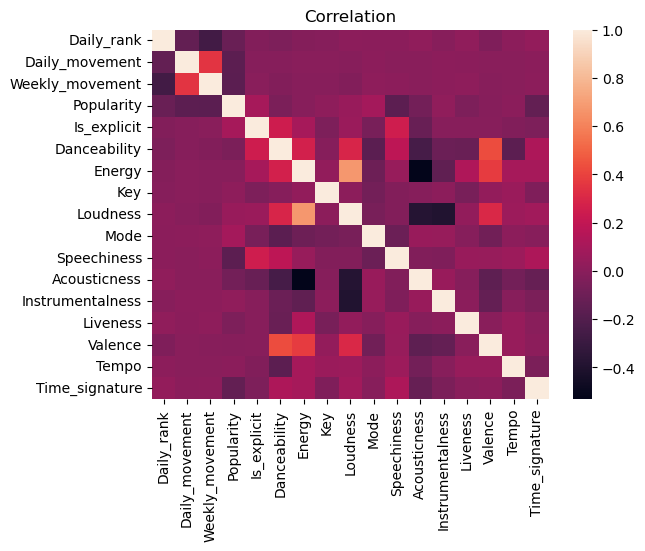

In [44]:
print(raw_df.corr(numeric_only=True))
sns.heatmap(raw_df.corr(numeric_only=True))
plt.title('Correlation')
plt.show()

Covariance

In [45]:
raw_df.cov(numeric_only=True)

Daily_rank  Daily_movement  Weekly_movement  Popularity  Is_explicit  Danceability    Energy        Key   Loudness      Mode  Speechiness  Acousticness  Instrumentalness  Liveness   Valence       Tempo  Time_signature
Daily_rank        208.183714      -14.374951       -46.826810  -26.046812    -0.192112     -0.085850 -0.050626  -0.747934   0.363369  0.047006     0.005530      0.086574         -0.014842  0.042805 -0.126102    4.519295        0.194220
Daily_movement    -14.374951       48.955559        29.605491  -17.989305    -0.048466     -0.013224 -0.000311  -0.071636  -0.191728  0.033706    -0.000986     -0.003949          0.005381  0.003342 -0.001819   -0.268699        0.014534
Weekly_movement   -46.826810       29.605491       147.430256  -32.613049    -0.026234     -0.049086 -0.014745  -0.346811  -0.961307  0.087247     0.013658     -0.011362          0.011975  0.020599 -0.023892    0.256170        0.041922
Popularity        -26.046812      -17.989305       -32.613049  248.233106     0.722036     -0.109937 -0.017406   0.742526   2.755011  0.737071    -0.230747     -0.303511          0.031816 -0.085859 -0.047593    0.928976       -0.878493
Is_explicit        -0.192112       -0.048466        -0.026234    0.722036     0.221036      0.016321  0.008001  -0.068635   0.088229 -0.015150     0.010552     -0.014247         -0.000357 -0.000516 -0.001071   -0.405717       -0.007935
Danceability       -0.085850       -0.013224        -0.049086   -0.109937     0.016321      0.020230  0.006280  -0.006495   0.139768 -0.011947     0.002360     -0.008898         -0.001623 -0.002014  0.013938   -0.642701        0.007117
Energy             -0.050626       -0.000311        -0.014745   -0.017406     0.008001      0.006280  0.027837   0.017674   0.383224 -0.008835     0.000672     -0.022230         -0.002682  0.002755  0.014340    0.479607        0.006794
Key                -0.747934       -0.071636        -0.346811    0.742526    -0.068635     -0.006495  0.017674  12.799994   0.149888 -0.138937    -0.007895     -0.009844          0.004396 -0.026794  0.026671    5.564905       -0.051365
Loudness            0.363369       -0.191728        -0.961307    2.755011     0.088229      0.139768  0.383224   0.149888  11.564082 -0.102260    -0.008639     -0.324699         -0.142494  0.012786  0.235240    5.828110        0.115766
Mode                0.047006        0.033706         0.087247    0.737071    -0.015150     -0.011947 -0.008835  -0.138937  -0.102260  0.248547    -0.004962      0.006203          0.002344 -0.000988 -0.009582    0.168033       -0.001639
Speechiness         0.005530       -0.000986         0.013658   -0.230747     0.010552      0.002360  0.000672  -0.007895  -0.008639 -0.004962     0.008229     -0.000740         -0.000354  0.000600  0.000905    0.169649        0.004607
Acousticness        0.086574       -0.003949        -0.011362   -0.303511    -0.014247     -0.008898 -0.022230  -0.009844  -0.324699  0.006203    -0.000740      0.062915          0.001453 -0.000441 -0.009098   -0.559381       -0.013226
Instrumentalness   -0.014842        0.005381         0.011975    0.031816    -0.000357     -0.001623 -0.002682   0.004396  -0.142494  0.002344    -0.000354      0.001453          0.011133  0.000059 -0.003171   -0.026156       -0.002114
Liveness            0.042805        0.003342         0.020599   -0.085859    -0.000516     -0.002014  0.002755  -0.026794   0.012786 -0.000988     0.000600     -0.000441          0.000059  0.015564 -0.000102    0.158752        0.000018
Valence            -0.126102       -0.001819        -0.023892   -0.047593    -0.001071      0.013938  0.014340   0.026671   0.235240 -0.009582     0.000905     -0.009098         -0.003171 -0.000102  0.052558    0.279693        0.001172
Tempo               4.519295       -0.268699         0.256170    0.928976    -0.405717     -0.642701  0.479607   5.564905   5.828110  0.168033     0.169649     -0.559381         -0.026156  0.158752  0.279693  787.107964       -0.591481
Time_s

### Cleaned Data

In [46]:
raw_df.info(show_counts=True)
raw_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752809 entries, 0 to 1752808
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Spotify_id          1752809 non-null  object        
 1   Name                1752809 non-null  object        
 2   Artists             1752809 non-null  object        
 3   Daily_rank          1752809 non-null  int64         
 4   Daily_movement      1752809 non-null  int64         
 5   Weekly_movement     1752809 non-null  int64         
 6   Country             1752809 non-null  object        
 7   Snapshot_date       1752809 non-null  datetime64[ns]
 8   Popularity          1752809 non-null  int64         
 9   Is_explicit         1752809 non-null  bool          
 10  Duration            1752809 non-null  object        
 11  Album_name          1752809 non-null  object        
 12  Album_release_date  1752809 non-null  datetime64[ns]
 13  Danceability

Spotify_id                               Name                      Artists  Daily_rank  Daily_movement  Weekly_movement               Country Snapshot_date  Popularity  Is_explicit Duration            Album_name Album_release_date  Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  Tempo  Time_signature
0        2plbrEY59IikOBgBGLjaoe                   DIE WITH A SMILE        LADY GAGA, BRUNO MARS           1               0                0                GLOBAL    2025-02-24          97        False    04:12      DIE WITH A SMILE         2024-08-16         0.521   0.592    6     -7.78     0       0.0304        0.3080            0.0000     0.122    0.535    158               3
1        2CGNAOSuO1MEFCbBRgUzjd                  LUTHER (WITH SZA)          KENDRICK LAMAR, SZA           2               1                0                GLOBAL    2025-02-24          90        False    02:58                   GNX         2024-11-21         0.707   0.575    2     -7.55     1       0.1250        0.2510            0.0000     0.248    0.576    138               4
2        4wJ5Qq0jBN4ajy7ouZIV1c                               APT.             ROSÉ, BRUNO MARS           3              -1                1                GLOBAL    2025-02-24          88        False    02:50                 ROSIE         2024-12-06         0.777   0.783    0     -4.48     0       0.2600        0.0283            0.0000     0.355    0.939    149               4
3        6AI3ezQ4o3HUoP6Dhudph3                        NOT LIKE US               KENDRICK LAMAR           4               0               -1                GLOBAL    2025-02-24          93         True    04:34           NOT LIKE US         2024-05-04         0.898   0.472    1     -7.00     1       0.0776        0.0107            0.0000     0.141    0.214    101               4
4        6dOtVTDdiauQNBQEDOtlAB                 BIRDS OF A FEATHER                BILLIE EILISH           5               0                0                GLOBAL    2025-02-24          94        False    03:30  HIT ME HARD AND SOFT         2024-05-17         0.747   0.507    2    -10.17     1       0.0358        0.2000            0.0608     0.117    0.438    105               4
...                         ...                                ...                          ...         ...             ...              ...                   ...           ...         ...          ...      ...                   ...                ...           ...     ...  ...       ...   ...          ...           ...               ...       ...      ...    ...             ...
1752804  0AYt6NMyyLd0rLuvr0UkMH          SLIME YOU OUT (FEAT. SZA)                   DRAKE, SZA          46               4                0  UNITED ARAB EMIRATES    2023-10-18          84         True    05:10      FOR ALL THE DOGS         2023-10-06         0.483   0.408    5     -9.24     0       0.0502        0.5080            0.0000     0.259    0.105     89               3
1752805  2Gk6fi0dqt91NKvlzGsmm7  SAY MY GRACE (FEAT. TRAVIS SCOTT)         OFFSET, TRAVIS SCOTT          47               3                0  UNITED ARAB EMIRATES    2023-10-18          80         True    02:53            SET IT OFF         2023-10-13         0.773   0.635   10     -5.06     1       0.0452        0.0585            0.0000     0.132    0.476    122               4
1752806  26b3oVLrRUaaybJulow9kz                             PEOPLE                     LIBIANCA          48               2                0  UNITED ARAB EMIRATES    2023-10-18          88        False    03:05                PEOPLE         2022-12-06         0.573   0.422   10     -7.62     0       0.0678        0.5510            0.0000     0.102    0.693    124               5
1752807  5ydjxBSUIDn26MFzU3asP4                         RAINY DAYS                            V          49               1                0  UNITED ARAB EMIRATES    2023-10-18          88        False

### Data Analysis

In [47]:
# setting CONSTANTS
SPOTIFY_GREEN = '#1DB954'
ID_NAME_MAPPER = raw_df.drop_duplicates(subset='Spotify_id').set_index('Spotify_id')['Name']
sns.set_palette('bright', desat=0.8)

##### Q1. Which are the Top 25 songs that have been in the Top 50 GLOBAL for the most number of days?

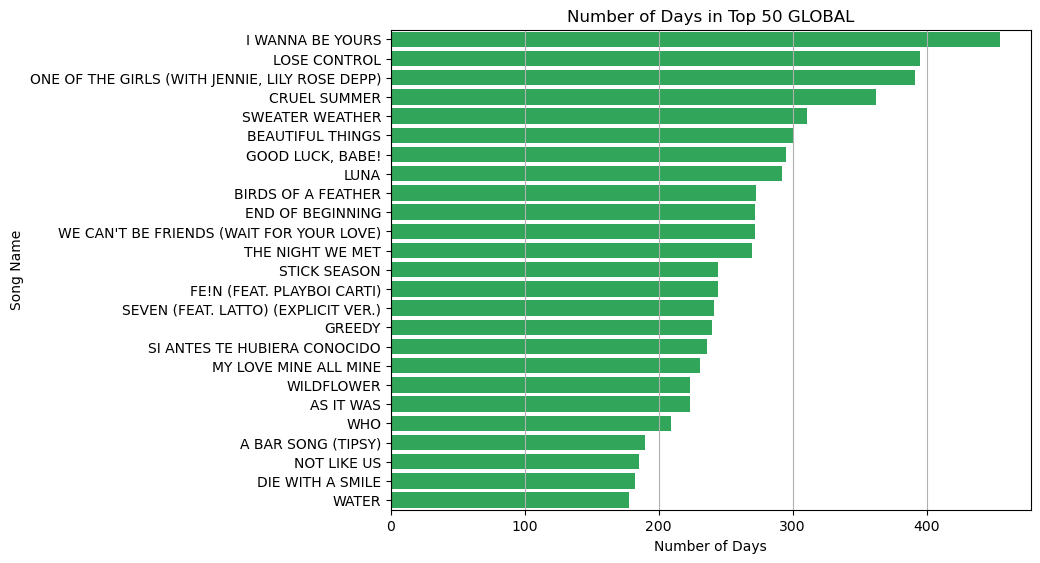

In [48]:
df = raw_df[(raw_df['Country'] == 'GLOBAL')][['Spotify_id', 'Name']]
df = df.groupby('Spotify_id').count().sort_values(by='Name', ascending=False).head(25).reset_index()
df['Song_name'] = df['Spotify_id'].map(ID_NAME_MAPPER)

ax = plt.axes((0,0,1,1))
ax = sns.barplot(data=df, x='Name', y='Song_name', color=SPOTIFY_GREEN)
ax.set_xlabel('Number of Days')
ax.set_ylabel('Song Name')
ax.set_title('Number of Days in Top 50 GLOBAL')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. 'I WANNA BE YOURS' was the Top 1 GLOBAL songs for around 450 days.

##### Q2. Which are the Top 25 songs that have been in the Top 50 INDIA for the most number of days?

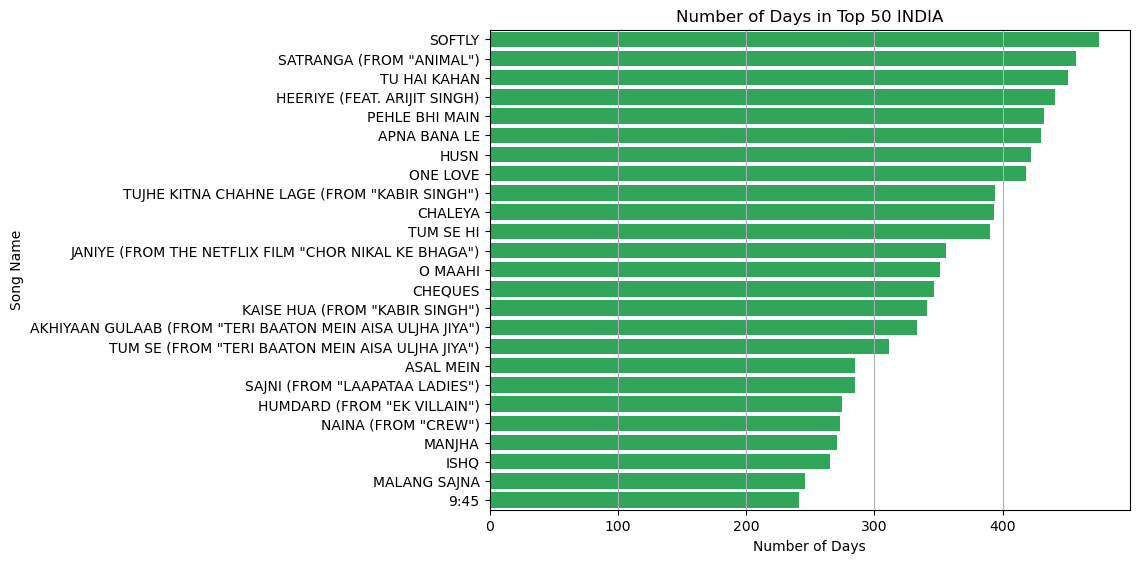

In [49]:
df = raw_df[(raw_df['Country'] == 'INDIA')][['Spotify_id', 'Name']]
df = df.groupby('Spotify_id').count().sort_values(by='Name', ascending=False).head(25).reset_index()
df['Song_name'] = df['Spotify_id'].map(ID_NAME_MAPPER)

ax = plt.axes((0,0,1,1))
ax = sns.barplot(data=df, x='Name', y='Song_name', color=SPOTIFY_GREEN)
ax.set_xlabel('Number of Days')
ax.set_ylabel('Song Name')
ax.set_title('Number of Days in Top 50 INDIA')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. In India, 'SOFTLY' was the Top 1 for the most days.

##### Q3. What is the distribution of the number of days it took for the songs to make it to Top 50 GLOBAL?

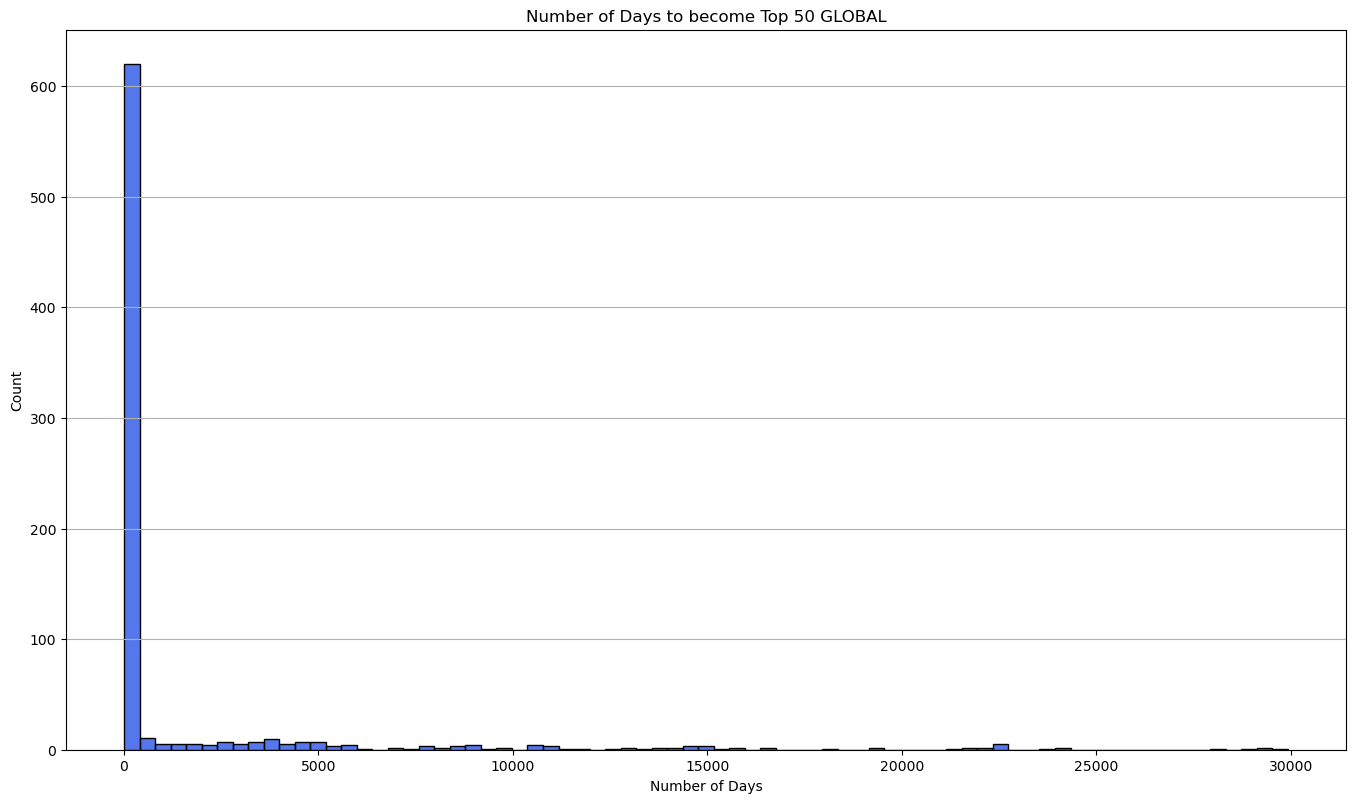

In [50]:
df = raw_df[raw_df['Country'] == 'GLOBAL'][['Spotify_id', 'Name', 'Snapshot_date', 'Album_release_date']]
df['Number_of_days'] = (df['Snapshot_date'] - df['Album_release_date']).dt.days
df = df.groupby('Spotify_id').min()

ax = plt.axes((0,0,2,1.5))
ax = sns.histplot(x='Number_of_days', data=df, binwidth=400, ax=ax)
ax.set_xlabel('Number of Days')
ax.set_title('Number of Days to become Top 50 GLOBAL')
ax.grid(axis='y')
plt.show()

Since the bins are too separated, lets divide the plot into two parts: \
Part 1: Number of days <= 30 \
Part 2: Number of days > 30

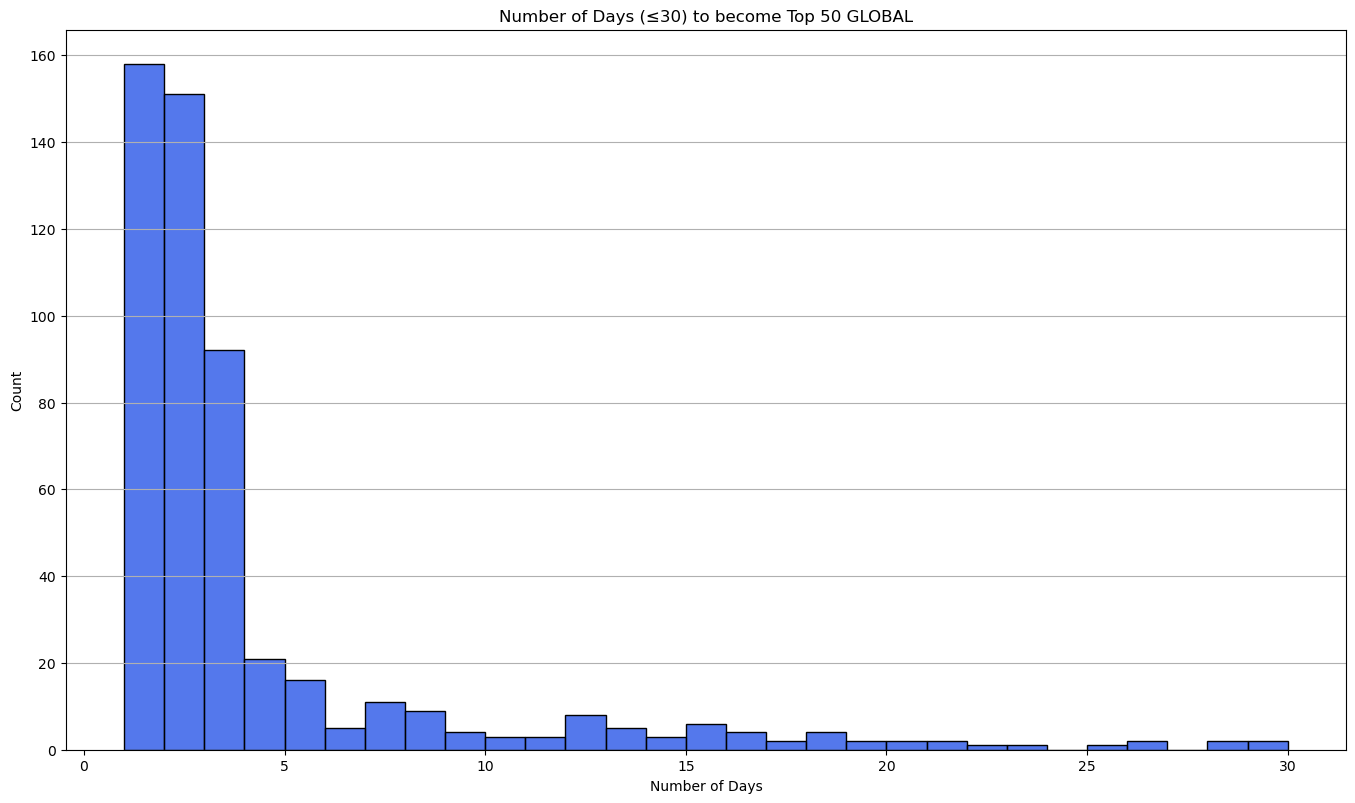

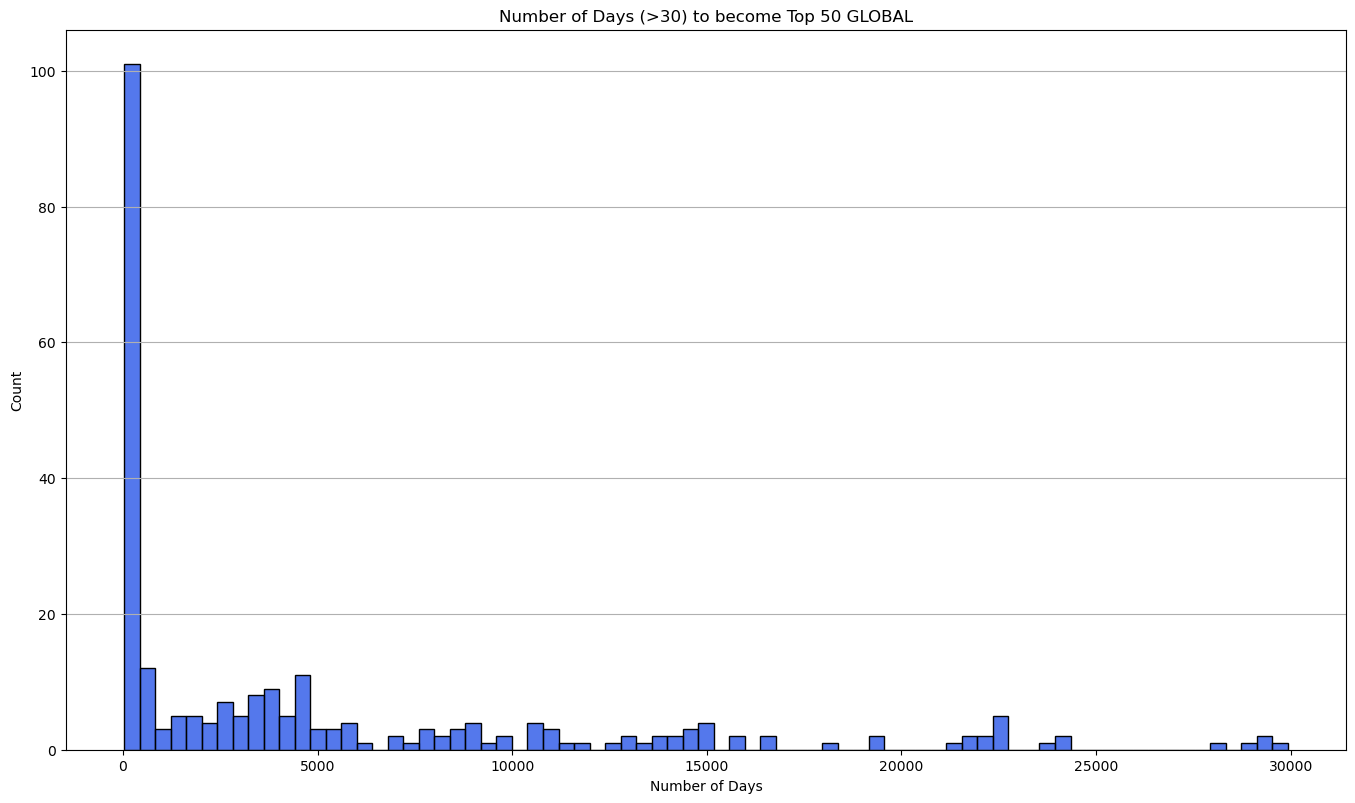

In [51]:
# Part 1: Number of days <= 30
ax = plt.axes((0,0,2,1.5))
df1 = df[df['Number_of_days'] <= 30]
ax = sns.histplot(x='Number_of_days', data=df1, binwidth=1, ax=ax)
ax.set_xlabel('Number of Days')
ax.set_title('Number of Days (≤30) to become Top 50 GLOBAL')
ax.grid(axis='y')
plt.show()

# Part 2: Number of days > 30
ax = plt.axes((0,0,2,1.5))
df1 = df[df['Number_of_days'] > 30]
ax = sns.histplot(x='Number_of_days', data=df1, binwidth=400, ax=ax)
ax.set_xlabel('Number of Days')
ax.set_title('Number of Days (>30) to become Top 50 GLOBAL')
ax.grid(axis='y')
plt.show()

Key points to observe from the plot:
1. Most of the songs took just one day to make it to Top 50 GLOBAL.
2. Some songs took more than 20,000 days to make it to Top 50 GLOBAL.

Lets see which songs those are,

In [52]:
df1 = df[df['Number_of_days'] > 20000].sort_values(by='Number_of_days', ascending=False)
df1

Name Snapshot_date Album_release_date  Number_of_days
Spotify_id                                                                                                                
4so0Wek9Ig1p6CRCHuINwW                     WHITE CHRISTMAS - 1947 VERSION    2023-12-05         1942-01-01           29923
3XsaSIPWvM61RIFfeb0BBR                     WHITE CHRISTMAS - 1947 VERSION    2024-12-21         1945-01-01           29209
0SUKNXEqZnRw7g0NO139FM  LET IT SNOW! LET IT SNOW! LET IT SNOW! (WITH T...    2024-12-16         1945-01-01           29204
04vLj9QUXoKdRlsp3gkURo                  MELE KALIKIMAKA (MERRY CHRISTMAS)    2023-12-27         1945-01-01           28849
25leEEaz1gIpp7o21Fqyjo  HERE COMES SANTA CLAUS (RIGHT DOWN SANTA CLAUS...    2023-12-27         1947-01-01           28119
3QiAAp20rPC3dcAtKtMaqQ                                     BLUE CHRISTMAS    2023-12-24         1957-10-15           24176
7vQbuQcyTflfCIOu3Uzzya                                   JINGLE BELL ROCK    2023-11-20         1957-12-02           24094
2uFaJJtFpPDc5Pa95XzTvg             LET IT SNOW! LET IT SNOW! LET IT SNOW!    2023-11-26         1959-01-01           23705
5humEOJehpAwMJEJmb0JJ2        THE CHRISTMAS SONG (MERRY CHRISTMAS TO YOU)    2023-12-17         1961-09-25           22728
1VuAamHM7P3VQQEXYGG3Uu                                   JOY TO THE WORLD    2023-12-27         1962-01-01           22640
0rHToGels2lt8Y0mCYoF90                                      DECK THE HALL    2023-12-26         1962-01-01           22639
4PS1e8f2LvuTFgUs1Cn3ON        THE CHRISTMAS SONG (MERRY CHRISTMAS TO YOU)    2023-12-04         1962-01-01           22617
0xxZY5C9xxij3D1HkzbnfC                                       MONSTER MASH    2023-11-02         1962-01-01           22585
5hslUAKq9I9CG2bAulFkHN           IT'S THE MOST WONDERFUL TIME OF THE YEAR    2024-12-06         1963-11-24           22293
1IcR6RlgvDczfvoWJSSY2A           IT'S THE MOST WONDERFUL TIME OF THE YEAR    2023-11-26         1963-01-01           22244
5xlS0QkVrSH7ssEbBgBzbM                     LITTLE SAINT NICK - 1991 REMIX    2023-12-25         1964-11-09           21595
2EjXfH91m7f8HiJN1yQg97                  ROCKIN' AROUND THE CHRISTMAS TREE    2023-11-20         1964-10-19           21581
77khP2fIVhSW23NwxrRluh                            A HOLLY JOLLY CHRISTMAS    2023-12-04         1965-10-01           21248

3. Almost all of those songs are old Christmas songs that become popular around Christmas.

Now lets look at the same plots in India.

##### Q4. What is the distribution of the number of days it takes for the songs to make it to Top 50 INDIA?

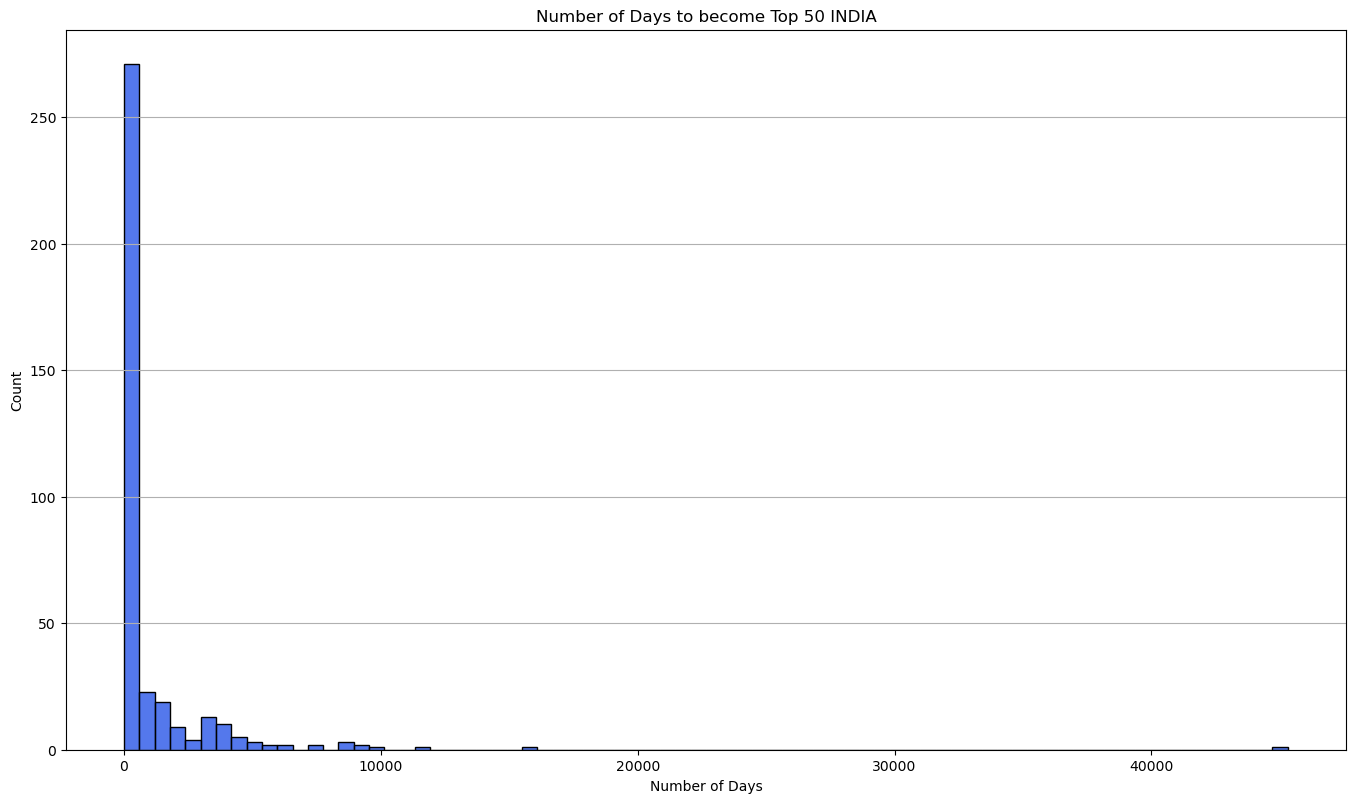

In [53]:
df = raw_df[raw_df['Country'] == 'INDIA'][['Spotify_id', 'Name', 'Snapshot_date', 'Album_release_date']]
df['Number_of_days'] = (df['Snapshot_date'] - df['Album_release_date']).dt.days
df = df.groupby('Spotify_id').min()

ax = plt.axes((0,0,2,1.5))
ax = sns.histplot(x='Number_of_days', data=df, binwidth=600, ax=ax)
ax.set_xlabel('Number of Days')
ax.set_title('Number of Days to become Top 50 INDIA')
ax.grid(axis='y')
plt.show()

Since the bins are too separated, lets divide the plot into two parts: \
Part 1: Number of days <= 30 \
Part 2: Number of days > 30

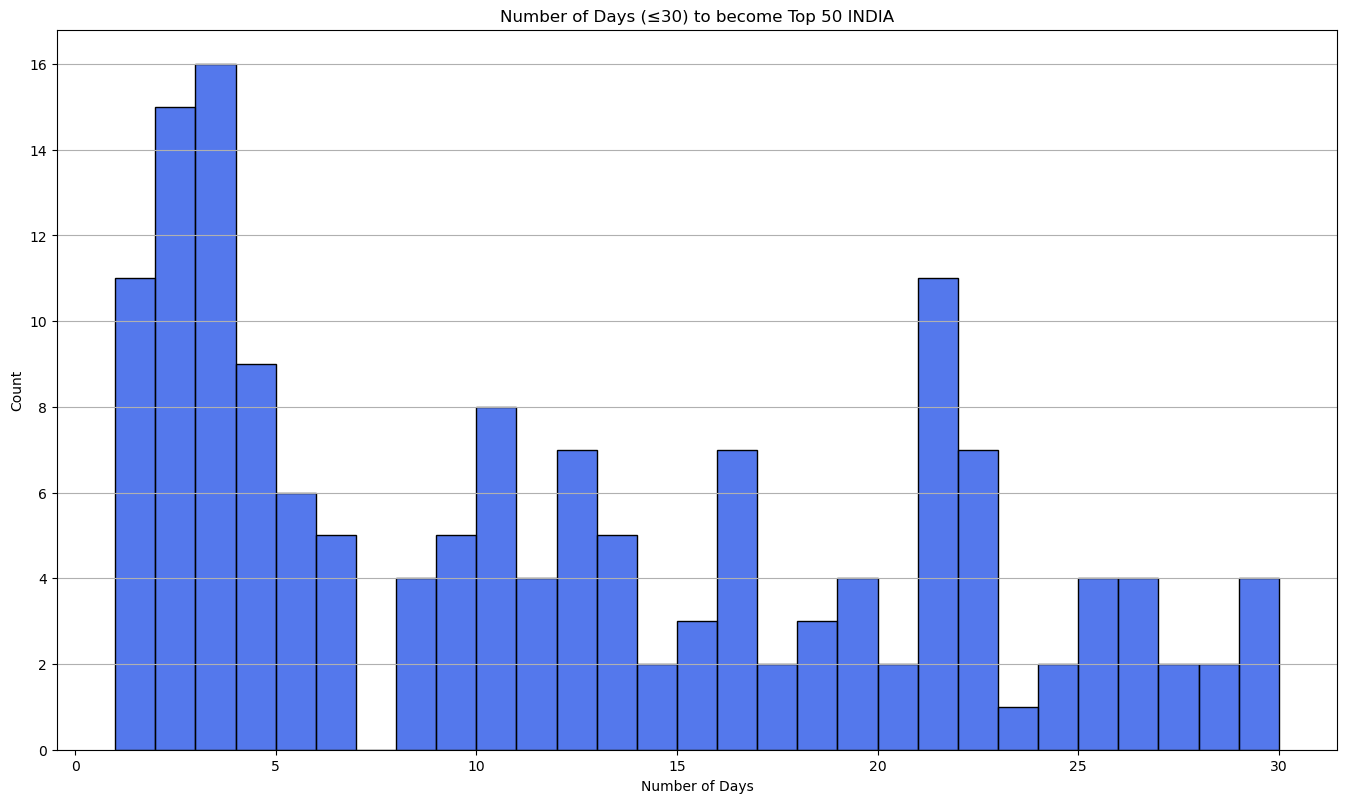

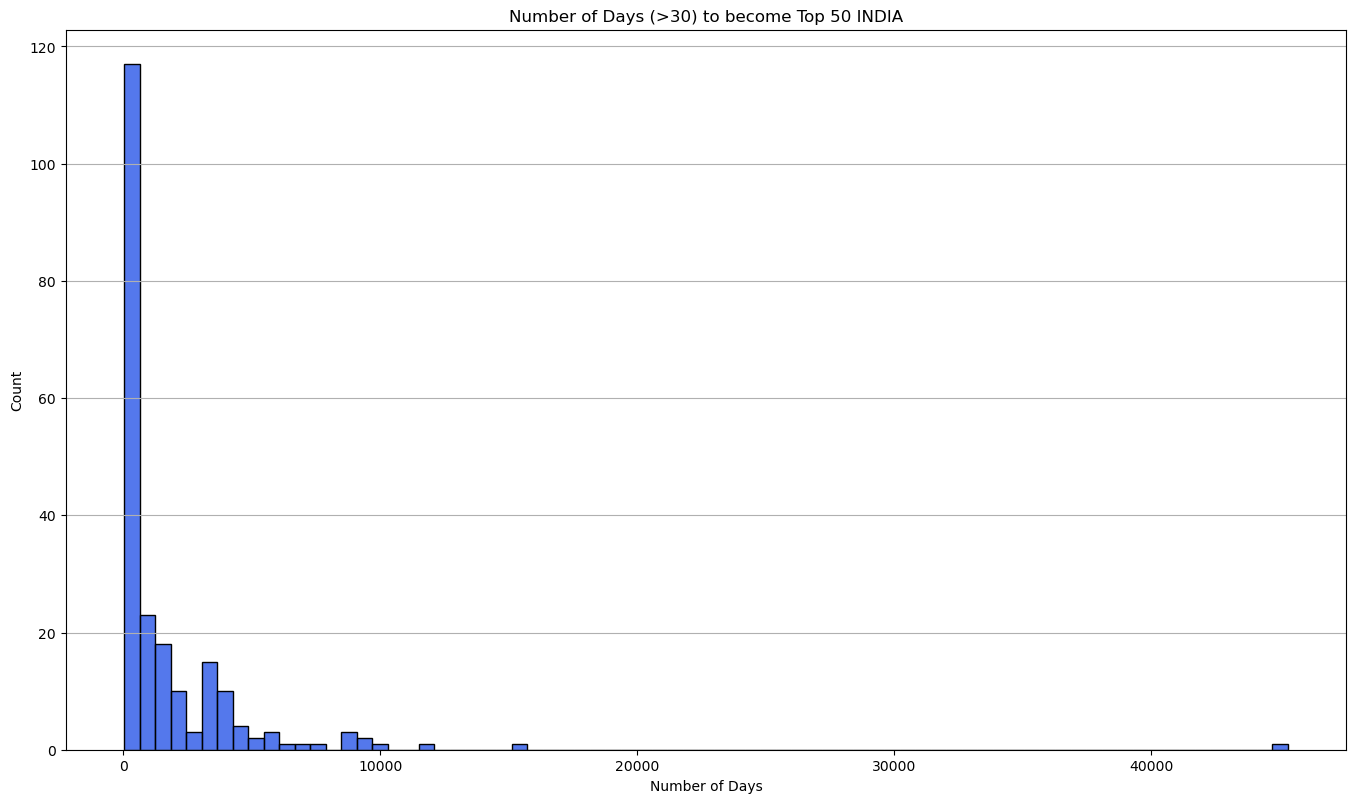

In [54]:
# Part 1: Number of days <= 30
ax = plt.axes((0,0,2,1.5))
df1 = df[df['Number_of_days'] <= 30]
ax = sns.histplot(x='Number_of_days', data=df1, binwidth=1, ax=ax)
ax.set_xlabel('Number of Days')
ax.set_title('Number of Days (≤30) to become Top 50 INDIA')
ax.grid(axis='y')
plt.show()

# Part 2: Number of days > 30
ax = plt.axes((0,0,2,1.5))
df1 = df[df['Number_of_days'] > 30]
ax = sns.histplot(x='Number_of_days', data=df1, binwidth=600, ax=ax)
ax.set_xlabel('Number of Days')
ax.set_title('Number of Days (>30) to become Top 50 INDIA')
ax.grid(axis='y')
plt.show()

Key points to observe from the plot:
1. In INDIA, on average, songs take more days to make in to Top 50 compared to GLOBAL as they are more spread out.
2. Some songs took more than 8,000 days to make it to Top 50 INDIA.

Lets see which songs those are,

In [55]:
df1 = df[df['Number_of_days'] > 8000].sort_values(by='Number_of_days', ascending=False)
df1

Name Snapshot_date Album_release_date  Number_of_days
Spotify_id                                                                                                                
6A2ZwOsMeomTIVhLvfXngC                                            NO LOVE    2024-01-20         1900-01-01           45309
4ctKPs1q73B2OQDhzNE1kz                       RANG BARSE BHEEGE CHUNARWALI    2024-03-26         1981-05-18           15653
6H7fLdt0AeWpuxUKXuXWrx                              SHREE HANUMAN CHALISA    2023-10-18         1992-01-01           11613
3aozKh1z4SSZXAm7TpcXtk                                   MAA TUJHE SALAAM    2024-08-16         1997-09-26            9821
7mpnIjYKrB6Yapa99q4klP                                  LAXMI JI KI AARTI    2023-11-14         1998-09-18            9188
5sf6rDJBoVyFXmYgNQIBy3                      SHENDUR LAAL CHADHAYO (AARTI)    2024-09-08         1999-08-28            9143
62bOmKYxYg7dhrC6gH9vFn  BYE BYE BYE - FROM DEADPOOL AND WOLVERINE SOUN...    2024-07-30         2000-03-21            8897
0dAUZoRp9bKsVrFNzqz8E8                                 KARU KARU KARUPAYI    2023-10-26         2000-02-04            8665
7sRyejjZ7Ebkgo1sy6Gmfj                            SHREE GANESHAY DHEEMAHI    2024-09-08         2001-01-01            8651

3. Almost all of those songs are religious songs that become popular yearly during religious events. This shows the importance of songs in religions. It also shows how old songs are kept alive by religious celebrations.

##### Q5. What is the average number of days it takes for songs to reach Top 50 in each country?

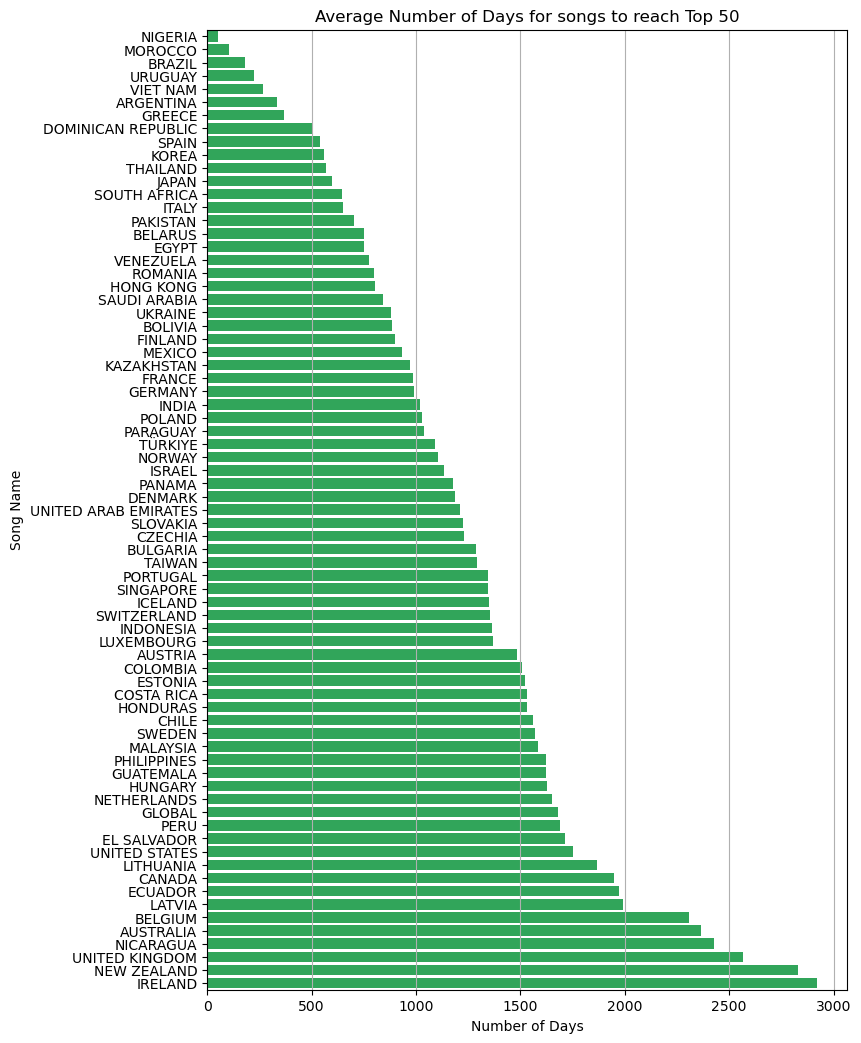

In [56]:
df = raw_df[['Country', 'Spotify_id', 'Name', 'Snapshot_date', 'Album_release_date']].copy()
df['Number_of_days'] = (df['Snapshot_date'] - df['Album_release_date']).dt.days
df = df.groupby(['Country', 'Spotify_id'], as_index=False).min()
df = df.groupby('Country', as_index=False).mean(numeric_only=True).sort_values(by='Number_of_days')

ax = plt.axes((0,0,1,2))
ax = sns.barplot(data=df, x='Number_of_days', y='Country', color=SPOTIFY_GREEN, ax=ax)
ax.set_xlabel('Number of Days')
ax.set_ylabel('Song Name')
ax.set_title('Average Number of Days for songs to reach Top 50')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. Songs in Nigeria take the least number of days on average to make it to the Top 50.
2. There are more of less-developed-countries who are among the quickest to shift to new songs, and more developed-countries that take more time to accept newer songs.

##### Q6. What kind of songs are popular in different countries?

In [57]:
df = raw_df[['Country', 'Spotify_id', 'Name', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 
             'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].copy()
df = df.groupby(['Country', 'Spotify_id'], as_index=False).min().set_index('Country')
df = df.loc[['CANADA', 'UNITED STATES', 
             'ARGENTINA', 'BRAZIL', 
             'DENMARK', 'SWEDEN', 'FINLAND', 
             'FRANCE', 'GERMANY', 'UNITED KINGDOM', 
             'GLOBAL', 
             'EGYPT', 'SOUTH AFRICA', 'NIGERIA', 
             'SAUDI ARABIA', 'UNITED ARAB EMIRATES', 
             'INDIA', 'PAKISTAN', 
             'JAPAN', 'KOREA', 
             'AUSTRALIA', 'NEW ZEALAND']]
df_mean = df.groupby('Country').mean(numeric_only=True)

df_mean

Danceability    Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness   Valence       Tempo
Country                                                                                                                            
ARGENTINA                 0.675845  0.651853 -6.679809     0.092451      0.254018          0.031843  0.197657  0.591412  116.718377
AUSTRALIA                 0.624448  0.630455 -7.017614     0.084379      0.267769          0.012532  0.192224  0.503638  121.824027
BRAZIL                    0.671211  0.703331 -5.210674     0.133444      0.372907          0.009089  0.304036  0.634445  127.785928
CANADA                    0.623330  0.613270 -7.242610     0.102177      0.276696          0.015685  0.196210  0.478514  121.387366
DENMARK                   0.685578  0.651275 -6.691349     0.136021      0.204554          0.008538  0.192938  0.549207  123.423280
EGYPT                     0.694175  0.665850 -6.615000     0.092842      0.363619          0.018755  0.179418  0.592200  120.103125
FINLAND                   0.653078  0.675034 -6.356949     0.085394      0.208852          0.025145  0.185647  0.537535  124.673448
FRANCE                    0.684438  0.634737 -7.256823     0.156879      0.301021          0.012729  0.164013  0.548305  121.092448
GERMANY                   0.690744  0.650315 -7.201860     0.156577      0.218066          0.020353  0.175614  0.502458  125.448805
GLOBAL                    0.637190  0.627880 -7.229793     0.096959      0.273243          0.022031  0.191006  0.502346  120.139715
INDIA                     0.643941  0.634809 -6.991855     0.087568      0.411907          0.009547  0.165802  0.539863  112.486559
JAPAN                     0.632299  0.764128 -4.859708     0.081772      0.129885          0.004637  0.177578  0.609015  127.529197
KOREA                     0.661831  0.688656 -5.430225     0.083841      0.204350          0.019727  0.172443  0.540590  122.947566
NEW ZEALAND               0.633150  0.631815 -7.086081     0.089436      0.258592          0.014213  0.184981  0.508832  122.267742
NIGERIA                   0.723903  0.662327 -7.224928     0.149585      0.287907          0.020804  0.170070  0.594785  115.850080
PAKISTAN                  0.650271  0.579201 -7.444637     0.098149      0.403990          0.007255  0.155385  0.501320  111.290503
SAUDI ARABIA              0.632882  0.664160 -6.746258     0.102423      0.262081          0.059249  0.194056  0.520452  120.312914
SOUTH AFRICA              0.692719  0.609191 -8.470191     0.121721      0.213357          0.055817  0.171192  0.484060  117.908513
SWEDEN                    0.628495  0.622621 -7.520737     0.105667      0.291745          0.029373  0.186289  0.516526  121.105991
UNITED ARAB EMIRATES      0.630373  0.615255 -7.365233     0.093508      0.263256          0.041927  0.180816  0.468279  121.349364
UNITED KINGDOM            0.611129  0.649382 -6.809401     0.097754      0.252939          0.015989  0.201256  0.497122  122.925187
UNITED STATES             0.628969  0.604652 -7.599077     0.107389      0.291612          0.023114  0.194361  0.470334  121.776418

A few countries from different parts of the world were selected and placed together.

Danceability - A measure of how suitable the song is for dancing based on various musical elements.

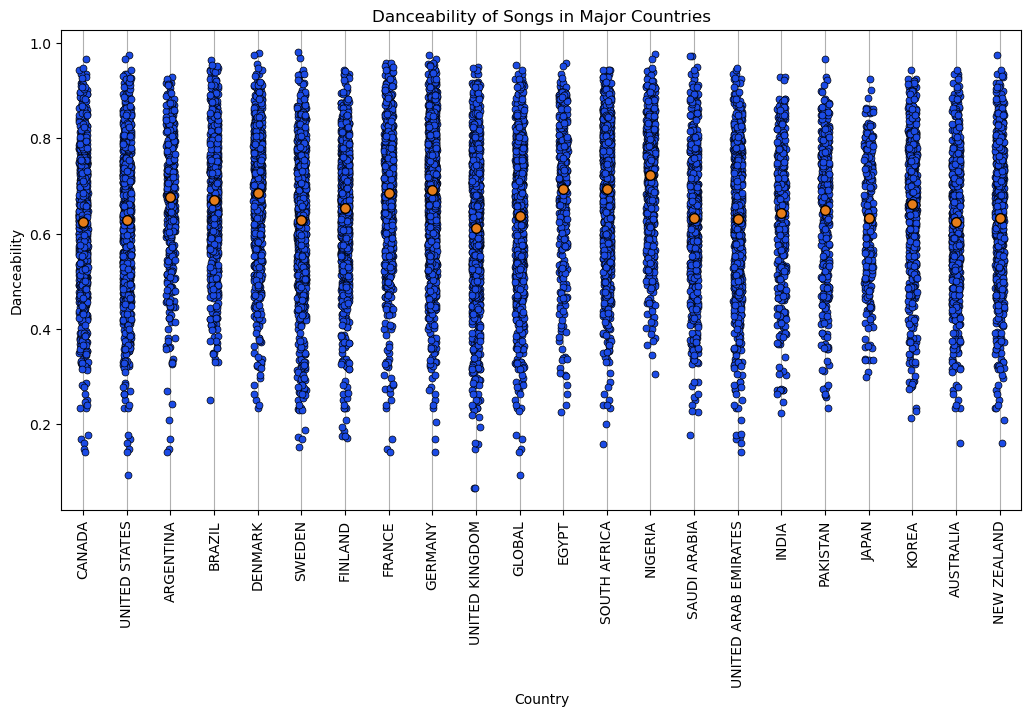

In [58]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Danceability', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Danceability', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Danceability')
ax.set_title('Danceability of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. The South African, South American, and European countries prefer more Danceable songs than the others.

Energy - A measure of the intensity and activity level of the song.

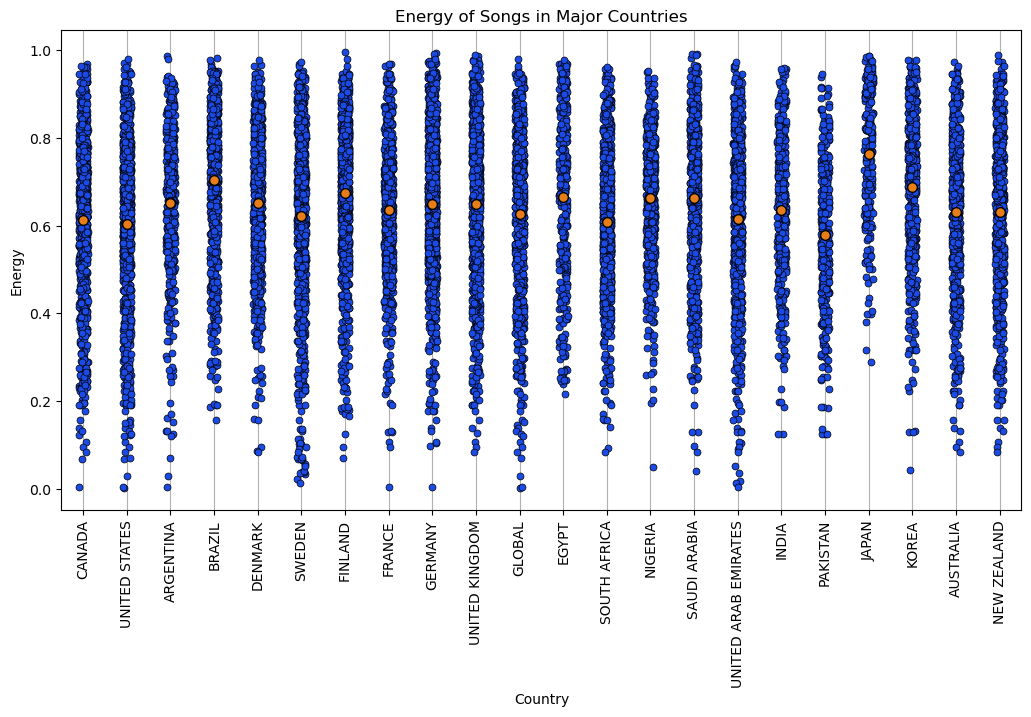

In [59]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Energy', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Energy', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Energy')
ax.set_title('Energy of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. The East-Asian countries, and Brazil prefer more high-energy songs.

Loudness - The overall loudness of the song in decibels.

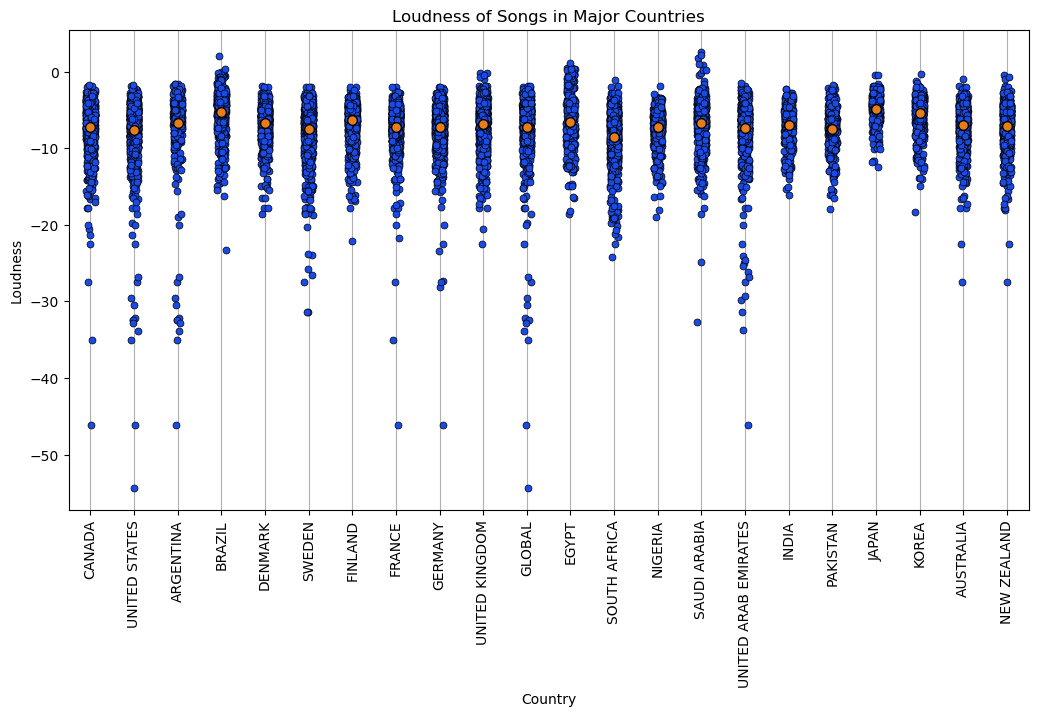

In [60]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Loudness', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Loudness', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Loudness')
ax.set_title('Loudness of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. The East-Asian countries, and Brazil prefer louder songs.
2. Some songs show extreme readings for Loudness.

Speechiness - A measure of the presence of spoken words in the song.

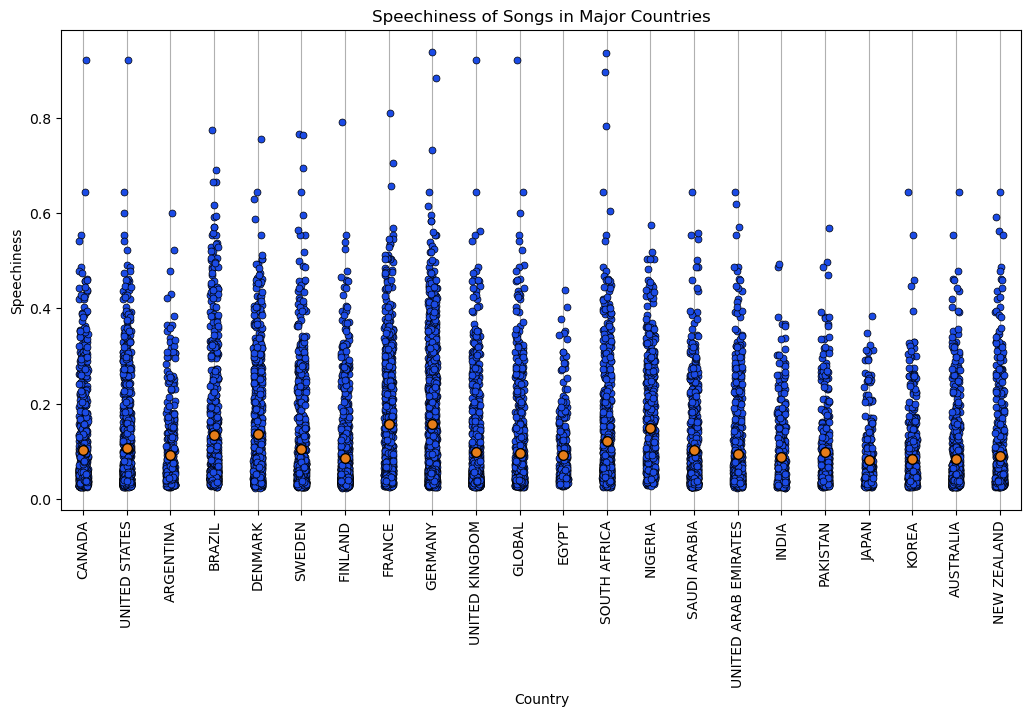

In [61]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Speechiness', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Speechiness', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Speechiness')
ax.set_title('Speechiness of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. France, Germany, and Nigeria prefer songs that contain more spoken words (eg. rap songs).

Acousticness - A measure of the acoustic quality of the song.

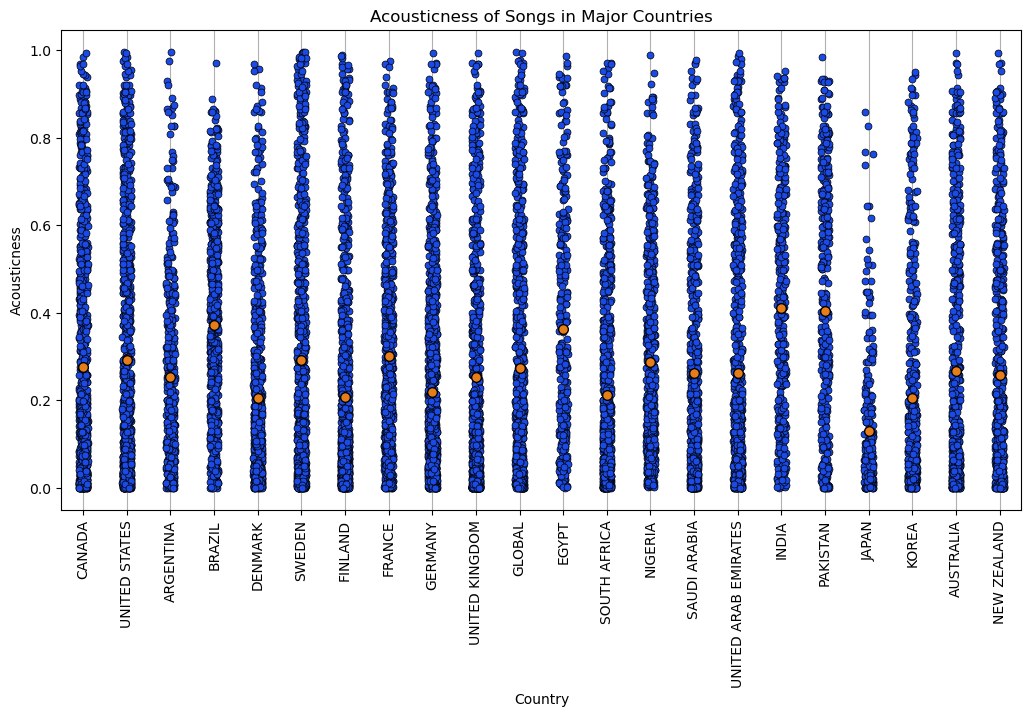

In [62]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Acousticness', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Acousticness', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Acousticness')
ax.set_title('Acousticness of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. India and Pakistan prefer more acoustic songs.
2. Japan prefers more electronic songs.

Instrumentalness - A measure of the likelihood that the song does not contain vocals.

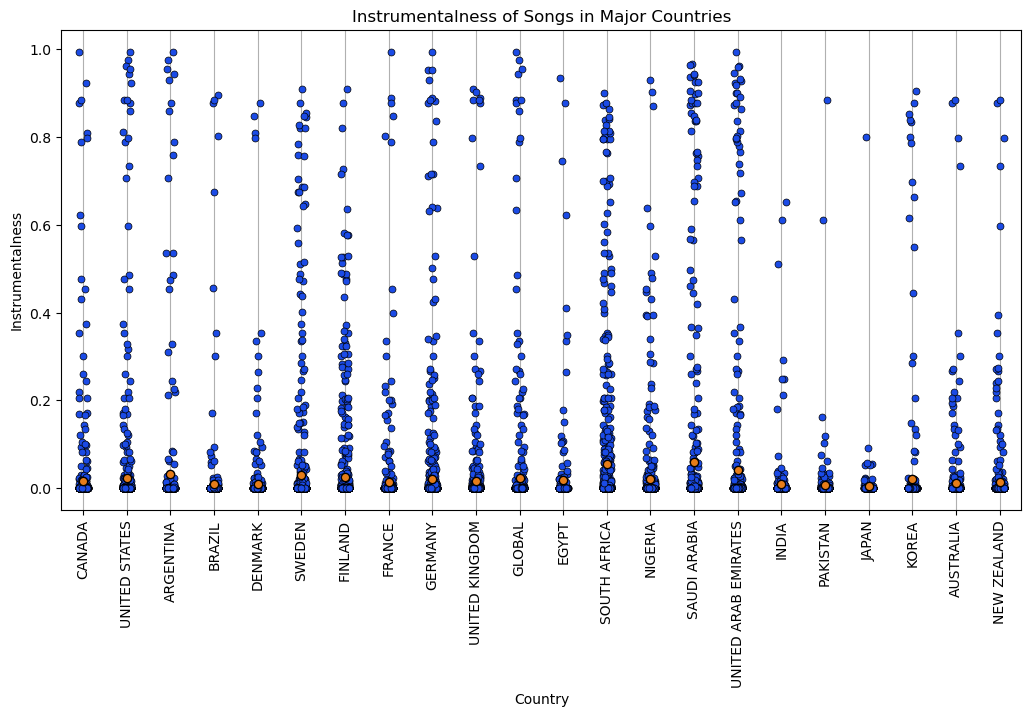

In [63]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Instrumentalness', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Instrumentalness', s=6, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Instrumentalness')
ax.set_title('Instrumentalness of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. The Gulf countries and South Africa prefer songs that doesn't contain vocals than other countries.

Liveness - A measure of the presence of a live audience in the recording.

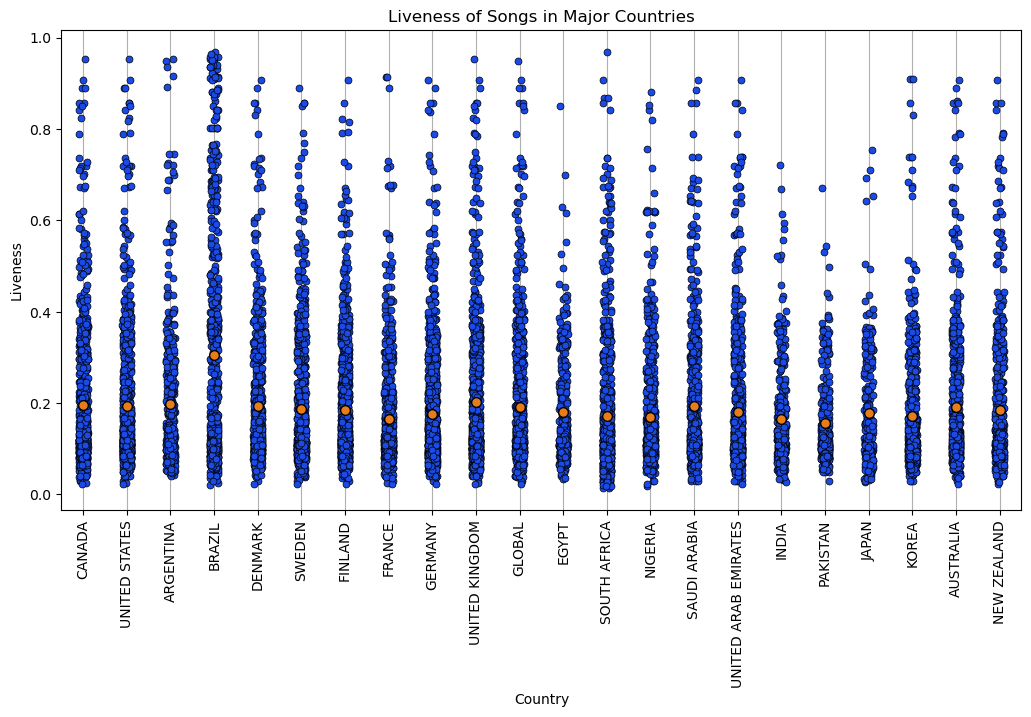

In [64]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Liveness', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Liveness', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Liveness')
ax.set_title('Liveness of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. Brazil prefers songs that contain live audience in the recording.

Valence - A measure of the musical positiveness conveyed by the song.

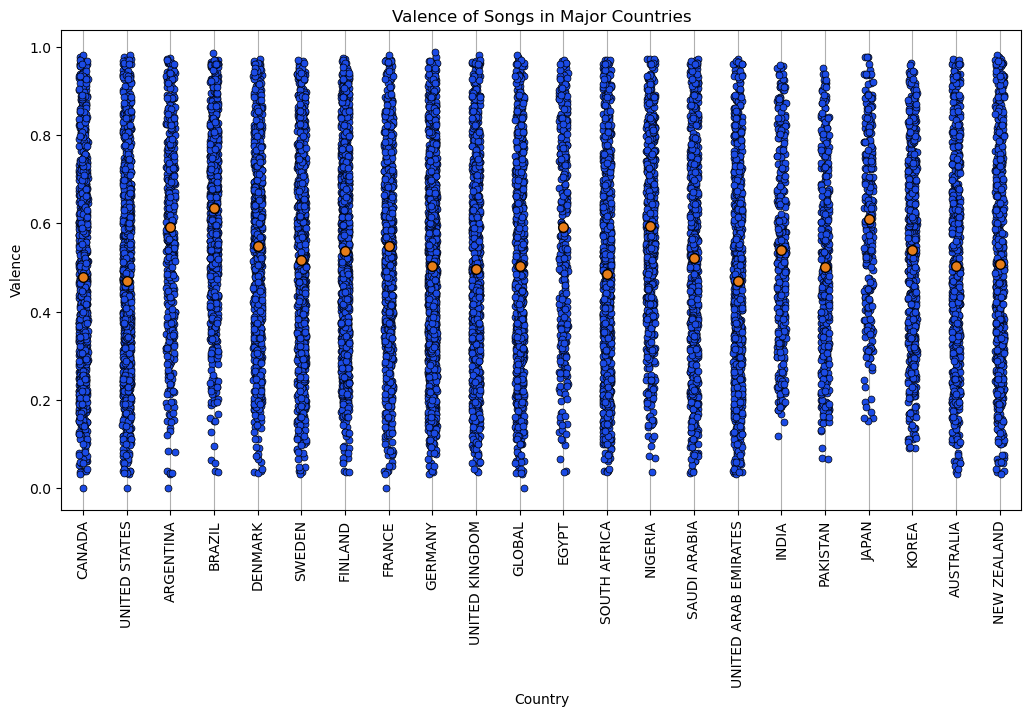

In [65]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Valence', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Valence', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Valence')
ax.set_title('Valence of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. The countries that prefer more Danceable and Energetic songs are also the ones that prefer more positive songs.
2. The American countries least prefer positive songs.

Tempo - The tempo of the song in beats per minute.

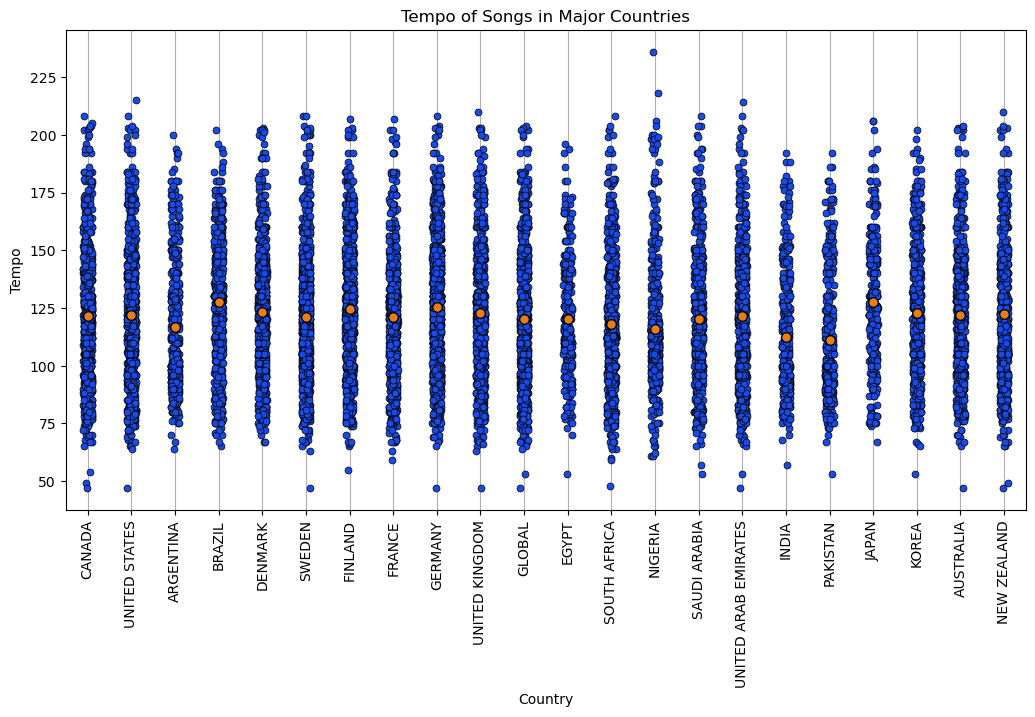

In [66]:
ax = plt.axes((0,0,1.5,1))
ax = sns.stripplot(data=df, x='Country', y='Tempo', edgecolor='k', linewidth=0.5, ax=ax)
ax = sns.stripplot(data=df_mean, x='Country', y='Tempo', s=7, edgecolor='k', linewidth=1, ax=ax)
ax.set_xlabel('Country')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Tempo')
ax.set_title('Tempo of Songs in Major Countries')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. East-Asian countries and Brazil prefer higher Tempo.
2. India and Pakistan prefer comparitively lower Tempo.

##### Q7. What artists have the most appearances in the Top 50 GLOBAL?

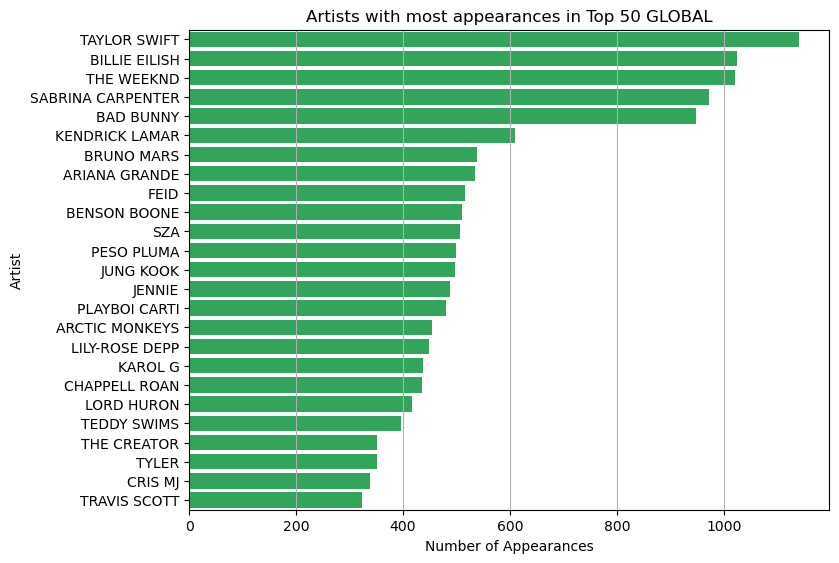

In [67]:
df = raw_df[raw_df['Country'] == 'GLOBAL'][['Spotify_id', 'Artists']]
df['Artists'] = df['Artists'].str.split(', ')
df = df.explode('Artists').groupby('Artists').count().sort_values(by='Spotify_id', ascending=False).reset_index().head(25)

ax = plt.axes((0,0,1,1))
ax = sns.barplot(data=df, x='Spotify_id', y='Artists', color=SPOTIFY_GREEN, ax=ax)
ax.set_xlabel('Number of Appearances')
ax.set_ylabel('Artist')
ax.set_title('Artists with most appearances in Top 50 GLOBAL')
ax.grid(axis='x')
plt.show()

Key points to observe from the plot:
1. Taylor Swift has the most appearances in the Top 50 GLOBAL. It shows the power of her huge fanbase.

##### Q8. How does Danceability relate to Loudness and Tempo of songs?

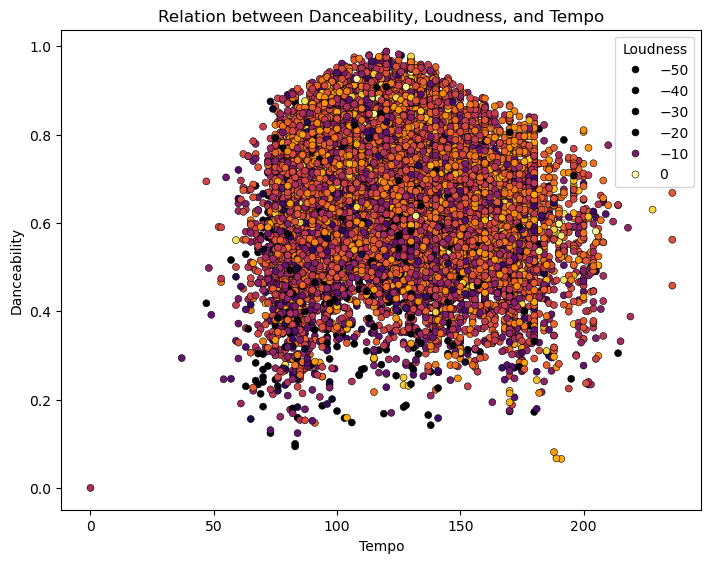

In [68]:
df = raw_df[['Spotify_id', 'Danceability', 'Loudness', 'Tempo']]
df = df.groupby('Spotify_id').min()

ax = plt.axes((0,0,1,1))
ax = sns.scatterplot(data=df, x='Tempo', y='Danceability', hue='Loudness', hue_norm=(-15, 0), palette='inferno', 
                     s=25, edgecolor='k', ax=ax)
ax.set_xlabel('Tempo')
ax.set_ylabel('Danceability')
ax.set_title('Relation between Danceability, Loudness, and Tempo')
ax.legend(loc='best', title='Loudness')
plt.show()

Key points to observe from the plot:
1. Songs with Tempo around 120 bpm are more Danceable than those with higher or lower Tempo. This might be because people resonate that Tempo for Dancing.
2. Louder songs are slightly more Danceable.

##### Q9. How does Energy of songs relate to Loudness of songs, and how does it affect their Popularity?

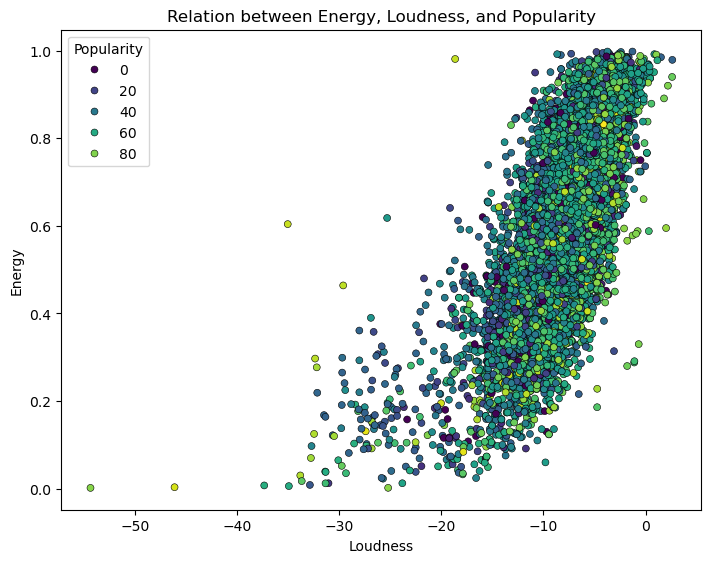

In [69]:
df = raw_df[['Spotify_id', 'Energy', 'Loudness', 'Popularity']]
df = df.groupby('Spotify_id').mean()

ax = plt.axes((0,0,1,1))
ax = sns.scatterplot(data=df, x='Loudness', y='Energy', hue='Popularity', palette='viridis', 
                     s=25, edgecolor='k', ax=ax)
ax.set_xlabel('Loudness')
ax.set_ylabel('Energy')
ax.set_title('Relation between Energy, Loudness, and Popularity')
ax.legend(loc='best', title='Popularity')
plt.show()

Key points to observe from the plot:
1. Energy of songs increase with the Loudness.
2. Songs that are in the extremes of Loudness are more Popular than the rest.

##### Q10. How does Energy of songs change with Acousticness and Tempo?

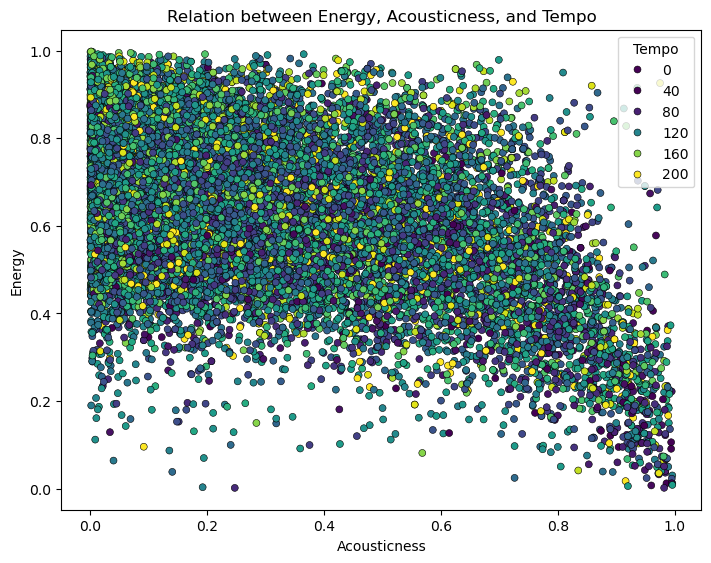

In [70]:
df = raw_df[['Spotify_id', 'Energy', 'Acousticness', 'Tempo']]
df = df.groupby('Spotify_id').mean()

ax = plt.axes((0,0,1,1))
ax = sns.scatterplot(data=df, x='Acousticness', y='Energy', hue='Tempo', hue_norm=(70, 180), palette='viridis', 
                     s=25, edgecolor='k', ax=ax)
ax.set_xlabel('Acousticness')
ax.set_ylabel('Energy')
ax.set_title('Relation between Energy, Acousticness, and Tempo')
ax.legend(loc='best', title='Tempo')
plt.show()

Key points to observe from the plot:
1. Energy has a kind of non-linear inverse relation with Acousticness.
2. Songs with high Energy and low Acousticness have higher Tempo and songs with low Energy and high Acousticness have low Tempo.

##### Q11. Songs with what Duration and Tempo are more Popular?

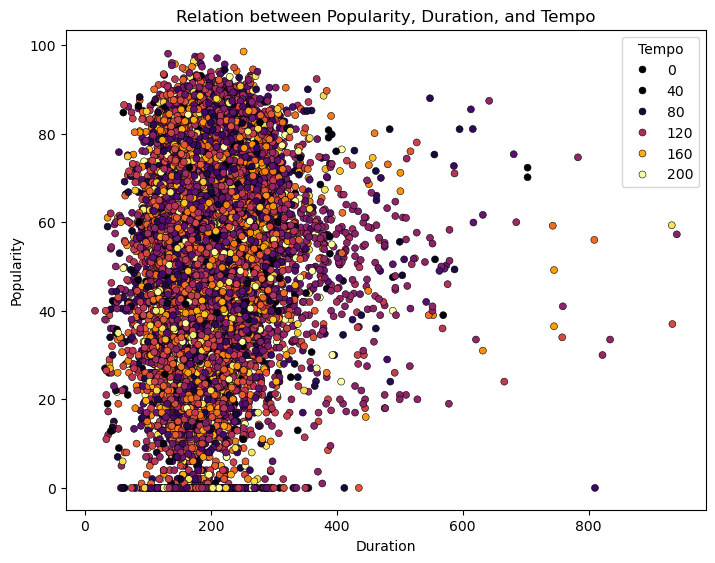

In [71]:
df = raw_df[['Spotify_id', 'Popularity', 'Duration', 'Tempo']].copy()
df['Duration'] = pd.to_timedelta('00:' + df['Duration']).dt.total_seconds()
df = df.groupby('Spotify_id').mean()

ax = plt.axes((0,0,1,1))
ax = sns.scatterplot(data=df, x='Duration', y='Popularity', hue='Tempo', hue_norm=(70, 180), palette='inferno', 
                     s=25, edgecolor='k', ax=ax)
ax.set_xlabel('Duration')
ax.set_ylabel('Popularity')
ax.set_title('Relation between Popularity, Duration, and Tempo')
ax.legend(loc='best', title='Tempo')
plt.show()

Key points to observe from the plot:
1. There isn't much relation between Popularity, Duration, and Tempo.

##### Q12. What countries are more accepting/tolerable to explicit songs?

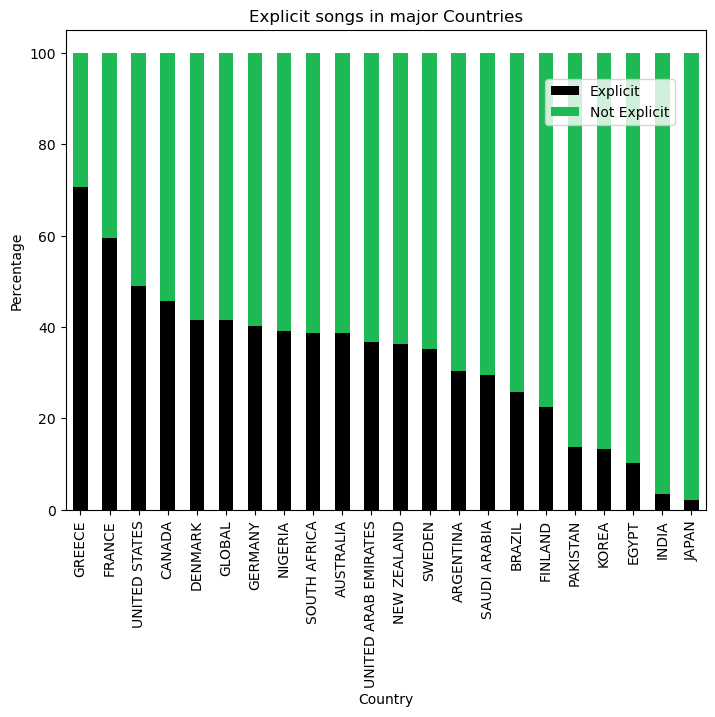

In [72]:
df = raw_df[['Country', 'Spotify_id', 'Is_explicit']]
df = df.groupby(['Country', 'Is_explicit']).nunique().unstack()['Spotify_id']
df = df.div(df.sum(axis=1), axis=0) * 100
df = df.iloc[:,[1, 0]]
df = df.loc[['CANADA', 'UNITED STATES', 
             'ARGENTINA', 'BRAZIL', 
             'DENMARK', 'SWEDEN', 'FINLAND', 
             'FRANCE', 'GERMANY', 'GREECE', 
             'GLOBAL', 
             'EGYPT', 'SOUTH AFRICA', 'NIGERIA', 
             'SAUDI ARABIA', 'UNITED ARAB EMIRATES', 
             'INDIA', 'PAKISTAN', 
             'JAPAN', 'KOREA', 
             'AUSTRALIA', 'NEW ZEALAND']]
df = df.sort_values(by=True, ascending=False)

ax = plt.axes((0,0,1,1))
ax = df.plot(kind='bar', stacked=True, title='Explicit songs in major Countries', ax=ax, color=['k', SPOTIFY_GREEN])
ax.set_ylabel('Percentage')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Explicit', 'Not Explicit'], loc='center', bbox_to_anchor=(0.85, 0.85))
plt.show()

Key points to observe from the plot:
1. The European and North American countries are more accepting to Explicit songs.
2. Japan and India have the least tolerance to Explicit songs.

#### Conclusion

In this EDA Project, I have cleaned and analysed the Daily Top 50 songs in 73 countries from Oct 2023 to Feb 2025. Here are the key points I noticed:
1. Religions play an important role in keeping old songs alive as they are played more during celebrations and make it to the Top 50 list.
2. Songs in developed countries take more days on average to make it to the top 50 when compared to the less developed countries. This suggests people in the less developed countries are quicker to accept something new than people in the developed countries.
3. East-Asian, South African and Latin American countries prefer high-energetic, high-tempo, loud and danceable songs.
4. India and Pakistan prefer songs that contain more instruments, whereas Japan prefers more electronic music.
5. The Gulf countries prefer songs that doesn't contain vocals more when compared to the other countries.
6. Songs with tempo in the range 110 - 130 bpm, are considered more danceable than songs with tempo above or below that range.
7. The energy of a song is proportional to its loudness.
8. Electronic music is more energetic than acoustic music. Energy and acousticness have a non-linear inverse relation with each other.
9. The European and North American countries are more accepting to explicit songs. Whereas, Japan and India have the least tolerance to Explicit songs.